In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
# sns.set_context('notebook')

# How do we generate random numbers?

In [2]:
np.random.random?

Docstring:
random(size=None)

Return random floats in the half-open interval [0.0, 1.0). Alias for
`random_sample` to ease forward-porting to the new random API.
Type:      builtin_function_or_method


In [ ]:
np.random.randint?

In [ ]:
np.random.randn?

In [ ]:
np.random.choice?

In [3]:
data = ["Red", "Green", "Green"]

np.random.choice(data, 3)

array(['Green', 'Green', 'Green'], dtype='<U5')

# How to ensure reproduceability?

In [4]:
np.random.seed?

Docstring:
seed(self, seed=None)

Reseed a legacy MT19937 BitGenerator

Notes
-----
This is a convenience, legacy function.

The best practice is to **not** reseed a BitGenerator, rather to
recreate a new one. This method is here for legacy reasons.
This example demonstrates best practice.

>>> from numpy.random import MT19937
>>> from numpy.random import RandomState, SeedSequence
>>> rs = RandomState(MT19937(SeedSequence(123456789)))
# Later, you want to restart the stream
>>> rs = RandomState(MT19937(SeedSequence(987654321)))
Type:      builtin_function_or_method


In [5]:
np.random.seed(10)

print(np.random.choice(data, 10))
print(np.random.choice(data, 10))

['Green' 'Green' 'Red' 'Red' 'Green' 'Red' 'Green' 'Green' 'Red' 'Green']
['Green' 'Green' 'Red' 'Green' 'Red' 'Green' 'Red' 'Green' 'Red' 'Red']


In [10]:
np.random.seed(10) # same results as before
print(np.random.choice(data, 10))
print(np.random.choice(data, 10))

['Green' 'Green' 'Red' 'Red' 'Green' 'Red' 'Green' 'Green' 'Red' 'Green']
['Green' 'Green' 'Red' 'Green' 'Red' 'Green' 'Red' 'Green' 'Red' 'Red']


# Designing simulations

Simulation is the process of using a computer to mimic a physical experiment. These experiments might, and in this class will, involve chance.

In this example, we want to simulate the **number of heads we get when we toss a coin 50 times**.

## Step 1: What to simulate

Specify the quantity to simulate: number of heads we get when we toss a coin 50 times

In [11]:
coin = ["Head", "Tail"]
N_toss = 50
what_to_count = "Head"

## Step 2: Simulating one value

In [12]:
def simulate():
    tossed = np.random.choice(coin, N_toss)
    count = np.count_nonzero(tossed == what_to_count)
    return count

In [13]:
simulate()

26

## Step 3: Number of repetitons

Since the experiment involves chance, the outcome of the experiment is different for every simulation.
We therefore **repeat the experiment very often** to get an idea of the effect of randomness on the outcome.

Here, we decide to repeat the simulation 10,000 times.

In [14]:
repetitions = 10000

## Step 4: Coding the simulation

In [15]:
outcomes = []

for i in range(repetitions):
    outcomes.append(simulate())

In [16]:
len(outcomes)

10000

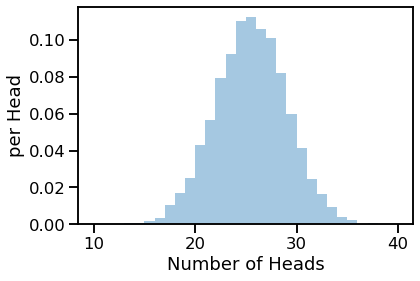

In [31]:
sns.distplot(outcomes, bins=np.arange(10, 40.5, 1.), kde=False, norm_hist=True);
plt.xlabel("Number of Heads")
plt.ylabel("per Head");
# bins (bins start, bins end, size between)

## Moves in Monopoly

In Monopoly, each move is determined by the sum of spots of two rolls of a die.

In [32]:
die = [1, 2, 3, 4, 5, 6]
N_rolls = 2

In [33]:
def simulate_two_die():
    return np.random.choice(die, N_rolls).sum()

In [34]:
repetitions = 10000

outcomes = []

for i in range(repetitions):
    outcomes.append(simulate_two_die())

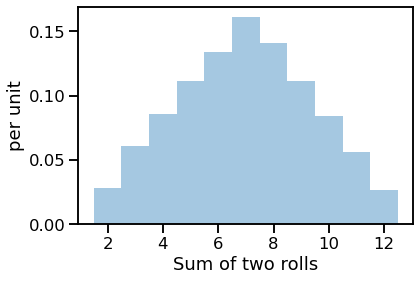

In [35]:
sns.distplot(outcomes, bins=np.arange(1.5, 13, 1.), kde=False, norm_hist=True);
plt.xlabel("Sum of two rolls")
plt.ylabel("per unit");
plt.xticks(range(2, 13, 2));